## NYC Taxi Trip Duration Prediction

### File descriptions
1. **train.csv** - the training set (contains 1458644 trip records)
2. **test.csv** - the testing set (contains 625134 trip records)
3. **sample_submission.csv** - a sample submission file in the correct format

### Data fields
1. **id** - a unique identifier for each trip
2. **vendor_id** - a code indicating the provider associated with the trip record
3. **pickup_datetime** - date and time when the meter was engaged
4. **dropoff_datetime** - date and time when the meter was disengaged
5. **passenger_count** - the number of passengers in the vehicle (driver entered value)
6. **pickup_longitude** - the longitude where the meter was engaged
7. **pickup_latitude** - the latitude where the meter was engaged
8. **dropoff_longitude** - the longitude where the meter was disengaged
9. **dropoff_latitude** - the latitude where the meter was disengaged
10. **store_and_fwd_flag** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
11. **trip_duration** - duration of the trip in seconds

### Steps to approach the problem:

#### Data Preprocessing and Finding Useful Features
1. Preprocess the data if required.
2. Find out the useful featured from the dataset.
3. Get new features from the existing data and see how they correlate and what new information they provide us.
4. Remove the redundand data that does not provides us with any new information.

#### Split data into training, test and validation sets
1. Split the dataset with all new features into train/test/validation sets.
2. Optionally, randomly shuffle the features so as to avoid overfitting.

#### Choose a Machine Learning Model
1. Choose a machine learning model and see that how that fits to the data. Try XGBOOST, scikit-learn models etc.
2. Once the model performs well, check that if adding/subtracting any feature increases accuracy of the model.

#### Final Model Visualization
1. Create a Flask page or post on the blog about the approach with visualizations.
2. Make a Dashboard using "Tableau" and show visualizations from the data.

## What would be the Useful Features by Intuition ??

Before we go into the data pre-processing and finding features step, let's see what would be some useful features that would decide what will be a taxi trip duration.

If you have ever taken a taxi, you will know that the trip time usually depends on these things:
1. The **Traffic conditions** of the place you are taking the taxi trip in. ex. New York City will have much more traffic as compared to some small town in Florida comparatively as maximum people tend to live in cities or go to city for vacation as compared to a small town somehwere in Florida. Hence, the total time to cover a distance of say 3 miles might take about 20 minutes in New York City whereas it might take it about 8 minutes in a small town in Florida. So, location is one of the important factors.

2. **Pickup and Dropoff Locations (Geo-locations/Co-ordinates)** will affect the total trip time for your taxi. If you start a ride in say Brooklyn and end somewhere in Brooklyn, then you might take a bit less time as compared to starting a trip at Times Square and ending the trip near World Trade Center. This is because Brooklyn is mostly a residential area whereas going from Times Square to World Trade Center you pass through tourist attractions, companies, more restarants etc. which tend to have more number of people there as compared to a residential area in Brooklyn.

3. **Overall Distance** is another factor of importance. Since we know the pickup and dropoff coordinates, we can get the overall distance travelled by the taxi. The distance tells us that more the distance, more time it'll take to complete the trip.

4. **Time of the Day** is another important aspect. If you are taking a trip in morning or evening in NYC, then maybe you will have to see more traffic as people are either going to work or leaving from work. But say if you take a trip in early morning say aroung 5 am, you will see less traffic than usual. These things will affect the total time the trip will take to complete.

5. **Day of the Year** is another important aspect for telling the amount of time your trip will take. If you are taking a trip on a vacation day like 4th of July or Christmas or New Year, more people tend to go to NYC to celebrate. Hence, more people, more traffic, more time it'll take for the trip to complete.

6. One last feature that might be of some importance could be the **Number of People Riding the Taxi**. If ore than 4 people are riding at a time then there is a higher probability that they are traveling in a bigger car as compared to a smaller one. This might take them a bit more time as compared to while travelling through a small car. Also, although, it's not the case in this dataset, but if the ride is being shared and there are multiple people taking the trip, there is a bigger probability that the driver will reroute before going to your final destination to dropoff other people if all are not going to the same location. Hence, this will tend to increase the overall time the trip will take to complete.

### Data Preprocessing and Finding Features

In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load Training Data
df = pd.read_csv('./dataset/train.csv')

In [3]:
# Check first 5 rows of the dataset to see how it looks like
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
# Check if the dataset is balanced?
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [5]:
# Get some useful Info about the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [6]:
# Get the Types of Each Feature
print('id is of type:\t',type(df['id'][0]))
print('vendor_id is of type:\t',type(df['vendor_id'][0]))
print('pickup_datetime is of type:\t',type(df['pickup_datetime'][0]))
print('dropoff_datetime is of type:\t',type(df['dropoff_datetime'][0]))
print('passenger_count is of type:\t',type(df['passenger_count'][0]))
print('pickup_longitude is of type:\t',type(df['pickup_longitude'][0]))
print('pickup_latitude is of type:\t',type(df['pickup_latitude'][0]))
print('dropoff_longitude is of type:\t',type(df['dropoff_longitude'][0]))
print('dropoff_latitude is of type:\t',type(df['dropoff_latitude'][0]))
print('store_and_fwd_flag is of type:\t',type(df['store_and_fwd_flag'][0]))
print('trip_duration is of type:\t',type(df['trip_duration'][0]))

id is of type:	 <class 'str'>
vendor_id is of type:	 <class 'numpy.int64'>
pickup_datetime is of type:	 <class 'str'>
dropoff_datetime is of type:	 <class 'str'>
passenger_count is of type:	 <class 'numpy.int64'>
pickup_longitude is of type:	 <class 'numpy.float64'>
pickup_latitude is of type:	 <class 'numpy.float64'>
dropoff_longitude is of type:	 <class 'numpy.float64'>
dropoff_latitude is of type:	 <class 'numpy.float64'>
store_and_fwd_flag is of type:	 <class 'str'>
trip_duration is of type:	 <class 'numpy.int64'>


Since, the count for all the columns is same, the dataset looks balanced. No missing values.

## Intuition-1: Traffic Conditions and Pickup & Dropoff Co-ordinates

***Let's take the Latitude and Longitude as our first set of features to explore and see how much information they provide us.***

In [7]:
# Mean Pickup and Dropoff Latitude
print('Mean Pickup Latitude: ', df['pickup_latitude'].mean())
print('Mean Dropoff Latitude: ',df['dropoff_latitude'].mean())

Mean Pickup Latitude:  40.750920908391734
Mean Dropoff Latitude:  40.7517995149002


In [8]:
# Mean Pickup and Dropoff Longitude
print('Mean Pickup Longitude: ', df['pickup_longitude'].mean())
print('Mean Dropoff Longitude: ',df['dropoff_longitude'].mean())

Mean Pickup Longitude:  -73.97348630489282
Mean Dropoff Longitude:  -73.9734159469458


In [9]:
# How much does the Pickup and Dropoff Latitude correlate with the Vendor ID?
print('CORR(Vendor ID, Pickup Latitude): ',df['vendor_id'].corr(df['pickup_latitude']))
print('CORR(Vendor ID, Dropoff Latitude): ',df['vendor_id'].corr(df['dropoff_latitude']))

CORR(Vendor ID, Pickup Latitude):  0.0017415877269832734
CORR(Vendor ID, Dropoff Latitude):  0.004496034679383334


In [10]:
# How much does the Pickup and Dropoff Longitude correlate with the Vendor ID?
print('CORR(Vendor ID, Pickup Longitude): ',df['vendor_id'].corr(df['pickup_longitude']))
print('CORR(Vendor ID, Dropoff Longitude): ',df['vendor_id'].corr(df['dropoff_longitude']))

CORR(Vendor ID, Pickup Longitude):  0.007820251202658914
CORR(Vendor ID, Dropoff Longitude):  0.0015284524154382344


C:\Users\ad1026858\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


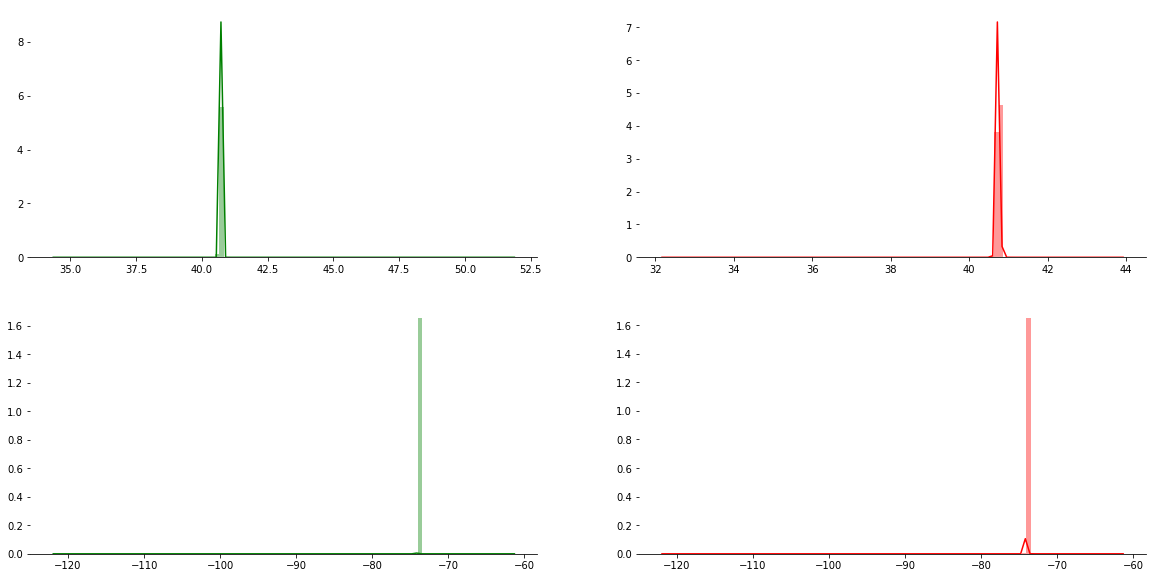

In [11]:
# Plot a univariate distribution of observations for latitude and longitude values to get a sense of where the most of the rides
# are concentrated in terms of location.
fig, ax = plt.subplots(2,2,figsize=(20, 10), sharex=False, sharey = False)
sns.despine(left=True)
sns.distplot(df['pickup_latitude'].values, label = 'pickup_latitude',color="g",bins = 100, ax=ax[0,0])
sns.distplot(df['dropoff_latitude'].values, label = 'dropoff_latitude',color="r",bins = 100, ax=ax[0,1])
sns.distplot(df['pickup_longitude'].values, label = 'pickup_longitude',color="g",bins = 100, ax=ax[1,0])
sns.distplot(df['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins = 100, ax=ax[1,1])

The above plots shows us that most of the rides are centered around the following coordinates:

Latitude: 40 to 41

Longitude: -73 to -74

If we see from the means of the latitude and longitude values that we derived above, we see that these values are correct. Also, if we check out these coordinates on a map, we get that the coordinates of (40.7128, 74.0060) correspond to that of NYC. Hence, our plot is correct.

One anomaly that we see here is that some of the trips that are from some other lat like 32 to 44 are taking a very long time and hence effecting the plot as such. These values are outliers and in the next step, we'll provide the bounds for the coordinates so as to remove these outliers.

Also, we see that the two vendors are positive correlated with the pickup and dropoff latitude and longitude as well. This means that they only operate in this region.

C:\Users\ad1026858\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


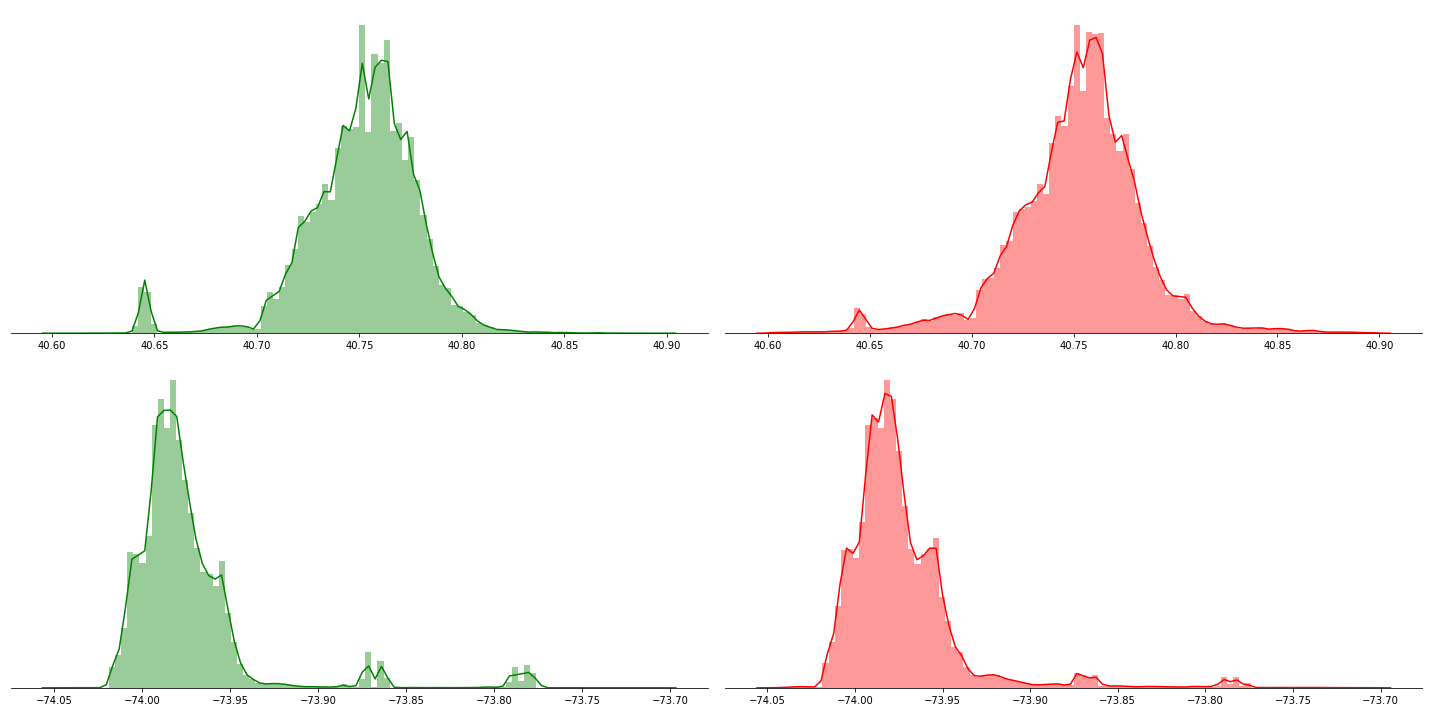

In [12]:
# Add bounds to coordinates from the dataset to avoid Outliers affecting the plots
df_coord = df.loc[(df.pickup_latitude > 40.6) & (df.pickup_latitude < 40.9)]
df_coord = df_coord.loc[(df.dropoff_latitude > 40.6) & (df.dropoff_latitude < 40.9)]
df_coord = df_coord.loc[(df.pickup_longitude > -74.05) & (df.pickup_longitude < -73.7)]
df_coord = df_coord.loc[(df.dropoff_longitude > -74.05) & (df.dropoff_longitude < -73.7)]

# Plot the distribution plot again with the same values but this time with the bounds in place for coordinates
fig, ax = plt.subplots(2,2,figsize=(20, 10), sharex=False, sharey = False)
sns.despine(left=True)
sns.distplot(df_coord['pickup_latitude'].values, label = 'pickup_latitude',color="g",bins = 100, ax=ax[0,0])
sns.distplot(df_coord['dropoff_latitude'].values, label = 'dropoff_latitude',color="r",bins = 100, ax=ax[0,1])
sns.distplot(df_coord['pickup_longitude'].values, label = 'pickup_longitude',color="g",bins = 100, ax=ax[1,0])
sns.distplot(df_coord['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins = 100, ax=ax[1,1])
plt.setp(ax, yticks=[])
plt.tight_layout()

Let's compare the above two plots. The earlier plot has a lot of outliers and hence showed a large spike in values. On bounding the coordinates to a range of interest, we can now see that the values of latitude are in the range of about 40.60 to 40.90 and the values for longitudes should be in the range of about -74.05 to -73.75.
This plot shows us that most of the trips are concentrated within these bounds of the coordinates.

Text(0.5,1,'City Map of NYC Trips using Latitudes and Longitudes')

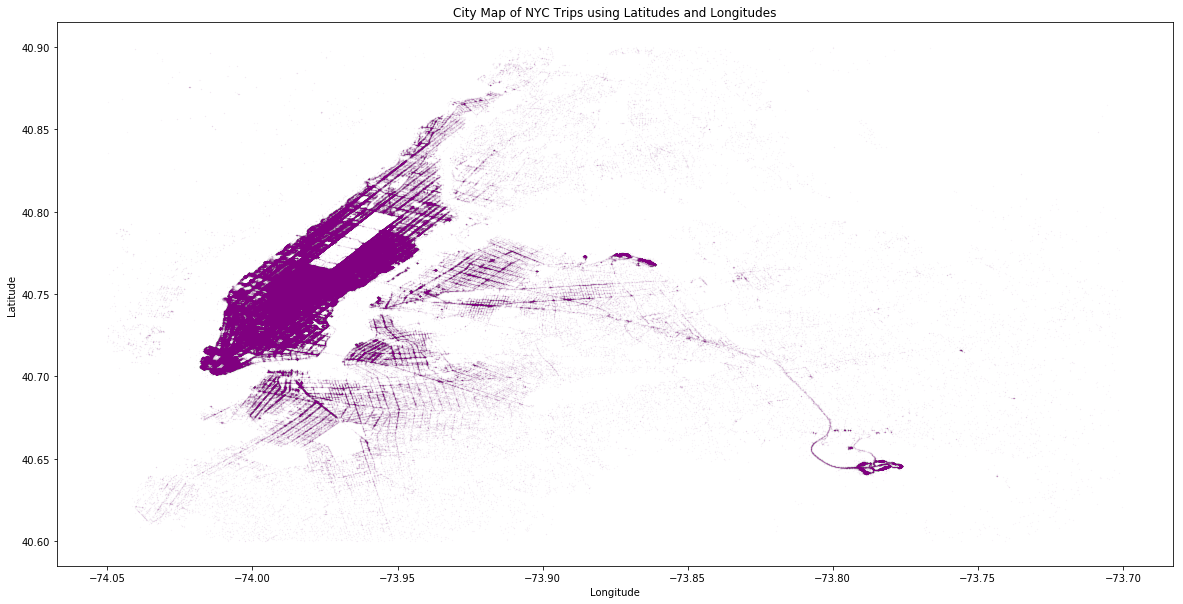

In [13]:
# Plotting the Latitude and Longitude values that we get after bounding them to see what we get
plt.figure(figsize=(20,10))

# Combining Pickup and Dropoff values into a list for Latitudes and Longitudes 
longitudes = list(df_coord.pickup_longitude) + list(df_coord.dropoff_longitude)
latitudes = list(df_coord.pickup_latitude) + list(df_coord.dropoff_latitude)

# Plot the latitude and Longitude values
plt.plot(longitudes, latitudes, '.', alpha=0.6, markersize=0.05, color='purple')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('City Map of NYC Trips using Latitudes and Longitudes')

Text(0.5,1,'Taxi Trip Dropoffs (Long,Lat)')

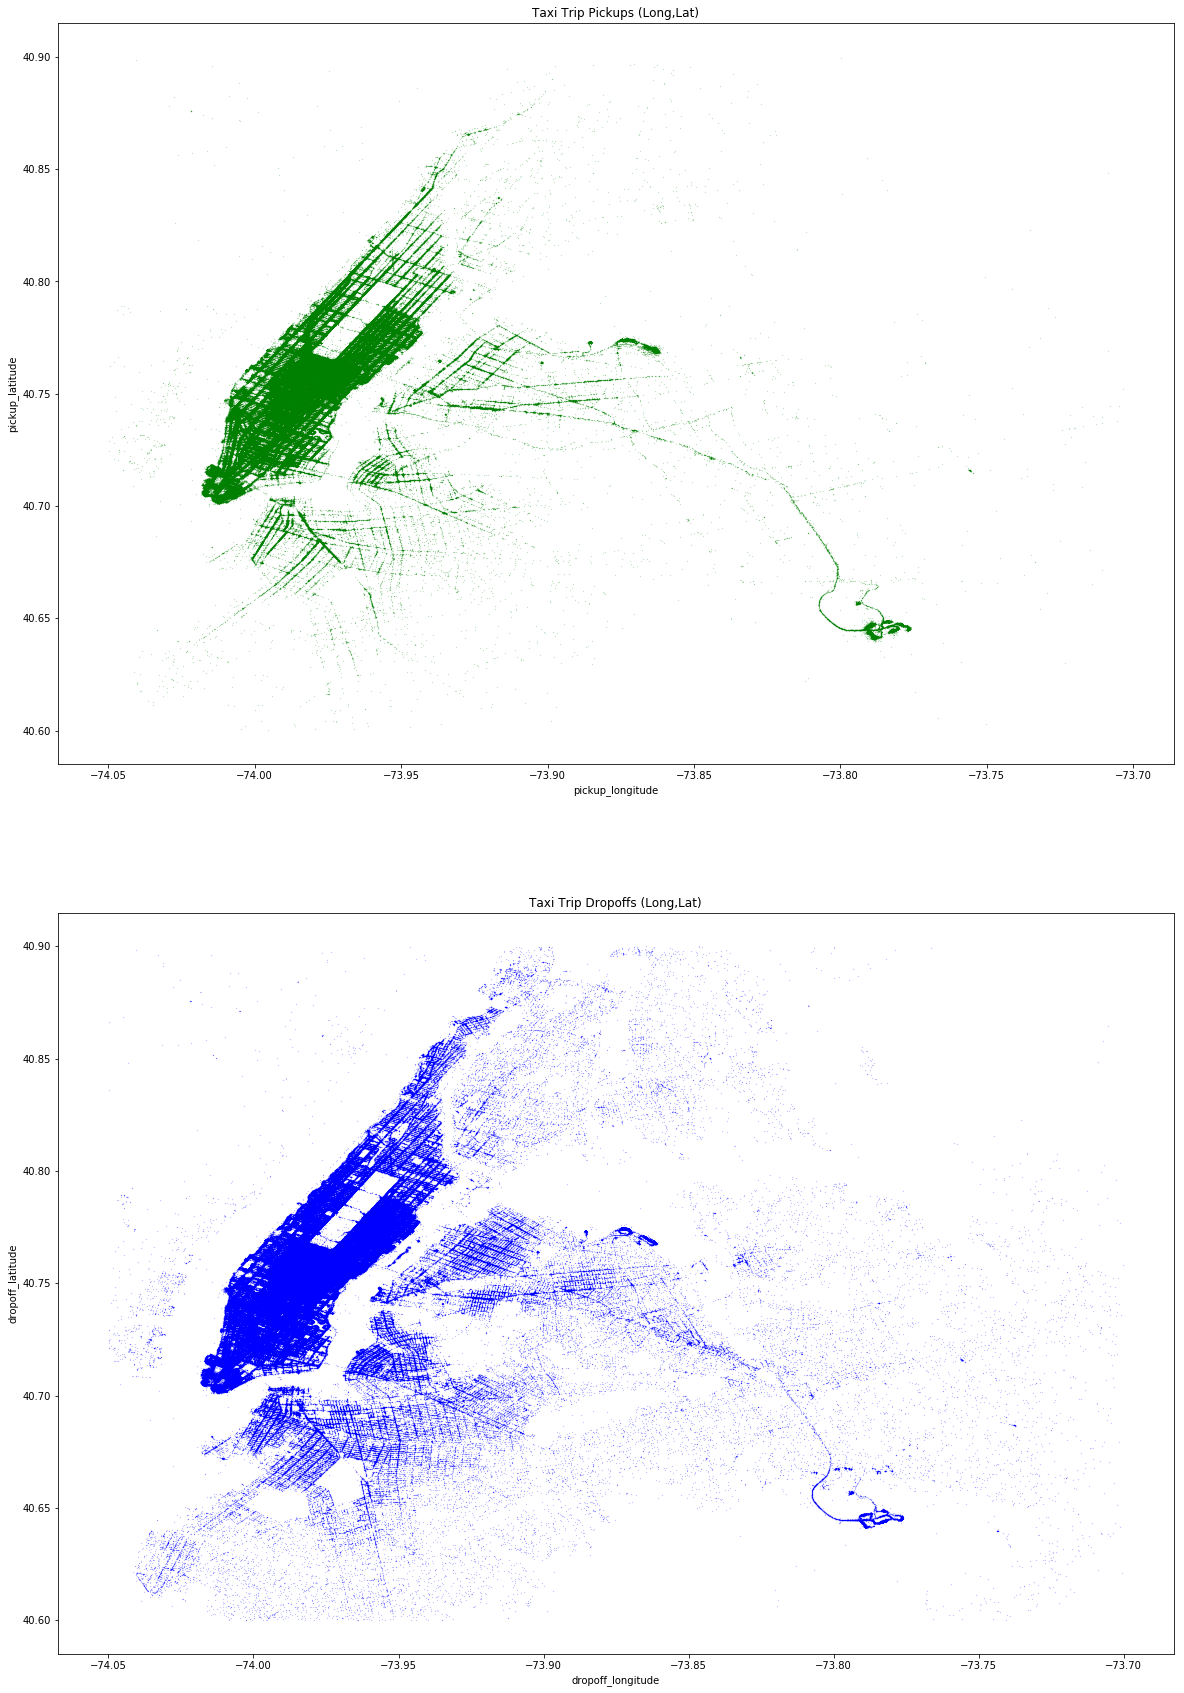

In [14]:
# Plot for showing the Pickup and Dropoff locations separately for every taxi trip in NYC.
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharey=True, figsize=(20,30))

df_coord.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude', color='green', s=0.02, alpha=0.6, subplots=True, ax=ax1)
df_coord.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude', color='blue', s=0.02, alpha=0.6, subplots=True, ax=ax2)
ax1.set_title('Taxi Trip Pickups (Long,Lat)')
ax2.set_title('Taxi Trip Dropoffs (Long,Lat)')

If we see the plots created above, we can see that the plot shows some city but is that actually a map of NYC? Let's compare this plot to an actual map.

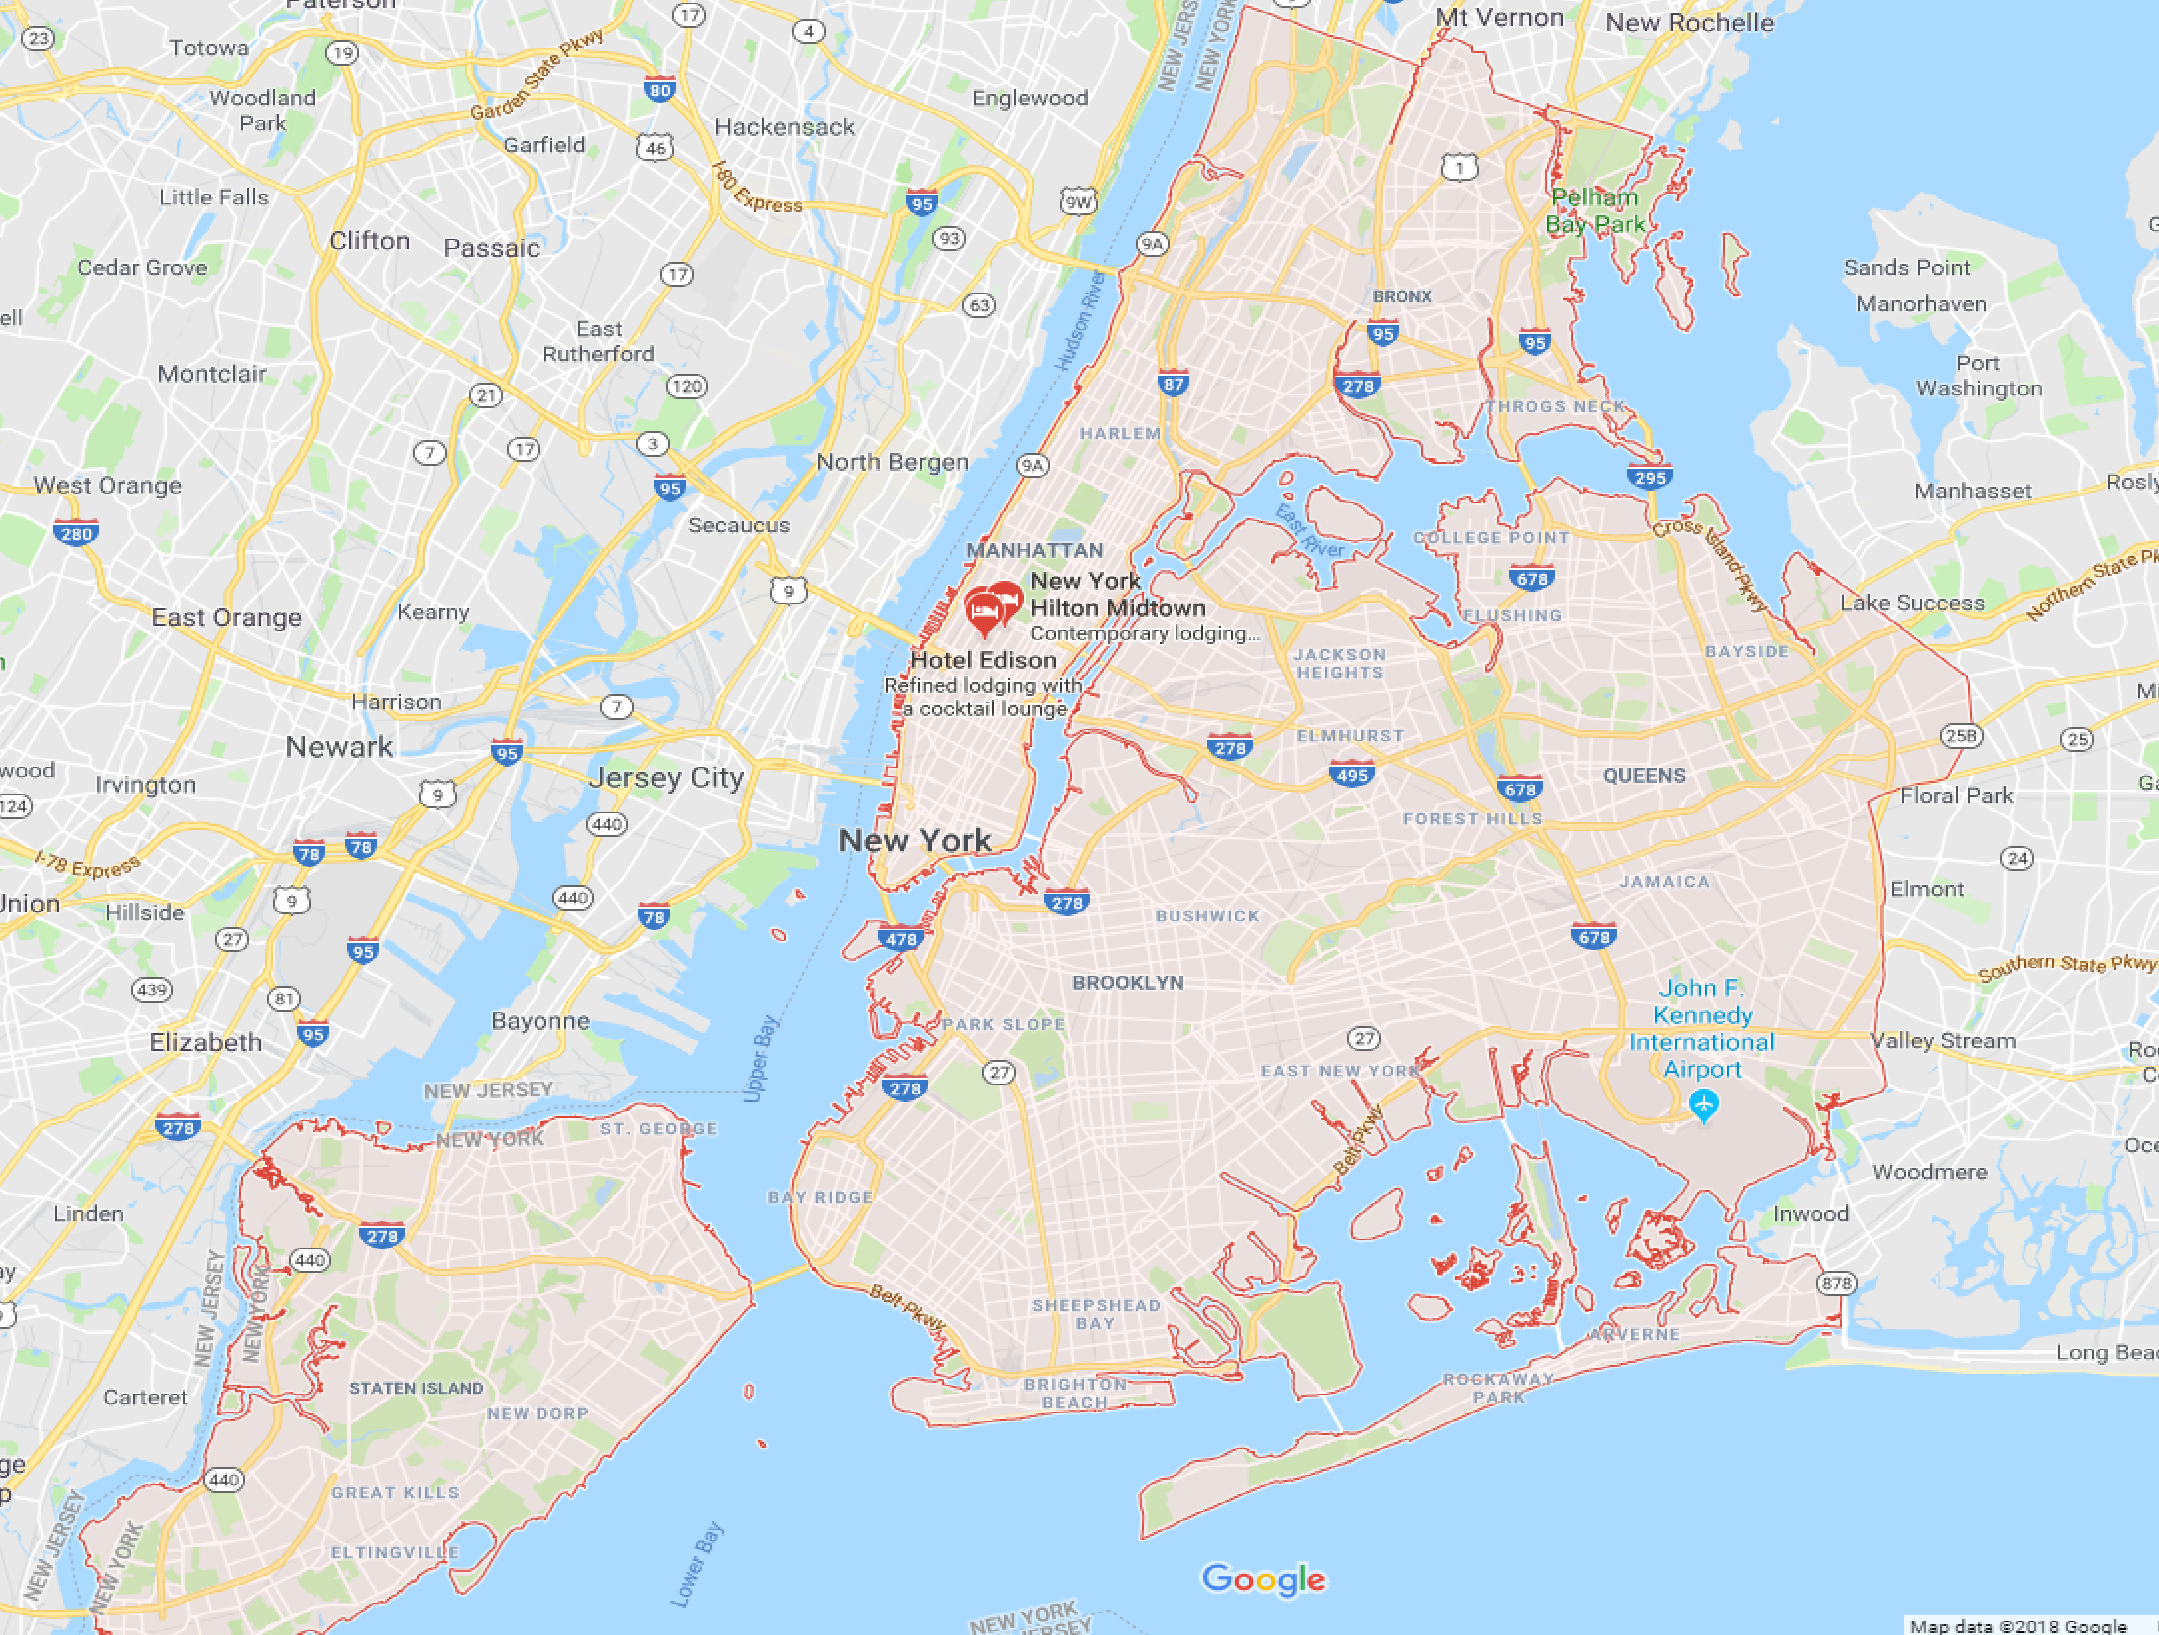

In [15]:
# Import to Show image in Jupyter Notebook
from IPython.display import Image

# Load and Display Image of NYC on map
Image('./nyc_img.png')

**CONCLUSION:**

**1.** The above two plots show the map for New York City. The map in purple shows the plot of taxi trip latitude vs longitudes. If we compare the map in purple to the one above, we can clearly see that our plot resembles with the map for NYC.

**2.** Specifically, we can see that our plot is more purple in the region of Manhattan and somewhat less in other areas like Brooklyn, Queens etc. This tells us that maximum number of trips for the taxi are in the Manhattan area. Ofcourse, these are the areas where you have Times Square, Central Park, Financial District etc. So, more number of people tend to use the taxi in this area. The area towards Brooklyn and Queens is more of residential area and has less number of companies. So, the number of taxi trips reduces here.

***This concludes our feature exploration for Traffic Conditions and Pickup and Dropoff Latitude and Longitude Co-ordinates. Next, let's see that how the taxi trip times are affected by the overall distance.***

## Intuition-2: Overall Distance